# WEEK7

# EXERCISE 2 : Text Analysis

# 1. Check the number of the reviews received for each product.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv("amazon_baby.csv")
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [3]:
df.groupby(by="name")[["review"]].count()

,review
name,
# 1 Digital Baby Thermometer - With FREE LIFETIME GUARANTEE: Using Non-Contact Infra Red (IR) Technology giving you instant and accurate temperature readings - Protect your BABY from FEVER and ILLNESS by using the DUAL Colour Digital Display and AUDIO ALARM function. Instant temperature reading from Baby Forehead within 1cm to 6cm distance - AUDIO Warning will trigger when temperature exceeds (37.5&#8451;) - Built in Memory to store 20 Readings - Fully FDA Approved &amp; (C.E.) Rated for Safety - Sold in one neat compact size 0.23kg weight. Durable Silicone touch buttons for durability - The non-contact design allows an instant temperature reading while your baby is sleeping. Can also be used to take the temperature of Baby Milk Bottles - In STOCK &amp; SHIPS today for FREE with Amazon.com,4
"#1 Adjustable Back Seat Baby Safety Mirror - Easy To Fit - Mirror Attaches In Seconds To Rear Seat Head Rest And Rotates And Pivots For A Clear View - Designed To Help You See Your Baby When They Are In A Reward Facing Car Seat, Without You Having To Turn Your Head Whilst Driving - No Obstruction To Rear View Visibility - High Quality Material - Best Life Time Guarantee - Top Selling Baby Safety Product From Happy Snuggle",1
"#1 Baby Bottle Brush for All Types of Bottles &#9733; Baby Feeder Nipple Cleaner Brush with Small, Long Plastic Grip Hanging Loop Handle &#9733; Ergonomic Safe Bristle Heads for All Types of Water, Beer, Wine Bottles and Cups &#9733; Best Bottle Cleaner for All Types of Small and Long Bottles with Narrow Neck &#9733; Finest Nipple Brush and Best Feeder Brush for Baby Bottles &#9733; Order High Quality Product with Lifetime Guarantee &#9733;",3
"#1 Premium Baby Nasal Aspirator by Cutietots - The Snot Sucker That Clears Away Baby\'s Stuffy Nose Gently and Instantly - Easy to Clean, Hygienic, BPA and Latex FREE - Great for Baby Showers with Its Lovely Packaging - Works Well with Nasal Saline Solutions - 100% Satisfaction Money Back Guarantee!!!",4
#120 - 2.5mm Dr Mom Specula Tips - Premium Quality,2
...,...
"zCush Cotton Characters Nap Mat, Googly Green",1
"zTcase&trade; Bluetooth Wireless Keyboard Case Cover for Samsung Galaxy Tab Pro 10.1 SM-T520 High Quality Folio Type for Professional and Personal Use (Tab Pro 10.1 inch, Black)",1
"zutano for aden by aden + anais 100% Cotton Muslin Burpy Bib, Walk In The Park",2


# 2. Check the products that have more than 15 reviews

In [4]:
temp = pd.DataFrame(df.groupby("name")[["review"]].count())
temp.loc[temp["review"] > 15]

,review
name,
&quot;A Little Pillow Company&quot; Hypoallergenic TODDLER PILLOW in White - 13&quot;x18&quot; (Ages 2 - 4),32
(1) Cresci Products Window Wedge (2 Per Pack) WHITE color,25
*SPECIAL PROMOTION*The Art of CureTM *SAFETY KNOTTED* Honey - Certified Baltic Amber Baby Teething Necklace w/The Art of CureTM Jewelry Pouch (SHIPS AND SOLD IN USA),62
*The Art of CureTM *SAFETY KNOTTED* - Mixed Colors - Certified Baltic Amber Baby Teething Necklace - w/The Art of CureTM Jewelry Pouch (SHIPS AND SOLD IN THE USA),24
*The Art of CureTM *SAFETY KNOTTED* Lemon - Certified Baltic Amber Baby Teething Necklace w/&quot;THE ART OF CURETM&quot; Jewelry Pouch (SHIPS AND SOLD IN USA),21
...,...
myBaby Soundspa Lullaby Sound Machine and Projector,87
mybaby HoMedics SoundSpa On-The-Go,57
"phil&amp;teds Lobster Highchair, Red",31


# 3. Find any missing review are present or not, If present remove those data.

In [5]:
df.dropna(how="any", subset=["review"], inplace=True)
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


# 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations.

In [6]:
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not", 
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had", 
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

Removing contractions,special characters and converting to lower case

In [7]:
def cont_to_exp(x):
    if type(x) is str:
        x=x.lower()
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
    return x
    
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))
df

,name,review,rating
0,Planetwise Flannel Wipes,"these flannel wipes are ok, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...,5
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried non-stop when i trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks! it is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product. i have...,5


Removing punctuations

In [8]:
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))
df

,name,review,rating
0,Planetwise Flannel Wipes,"these flannel wipes are ok, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...,5
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried non-stop when i trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks! it is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product. i have...,5


# 5. Add the Polarity, length of the review, the word count and average word length of each review.

In [9]:
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['review_len'] = df['review'].apply(lambda x:len(x))
df['word_count'] = df['review'].apply(lambda x: len(x.split()))
df



,name,review,rating,polarity,review_len,word_count
0,Planetwise Flannel Wipes,"these flannel wipes are ok, but in my opinion ...",3,0.083333,452,79
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.367000,158,30
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,0.293333,143,23
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...,5,0.318767,390,74
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried non-stop when i trie...,5,0.727474,404,76
...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea! very handy to have and look...,5,0.626000,137,27
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks! it is a great blend of fu...,5,0.440625,354,64
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kids.......,5,0.650000,93,17
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product. i have...,5,0.379694,854,170


In [10]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 


df['avg_word_len'] = df['review'].apply(lambda x: get_avg_word_len(x))
df

,name,review,rating,polarity,review_len,word_count,avg_word_len
0,Planetwise Flannel Wipes,"these flannel wipes are ok, but in my opinion ...",3,0.083333,452,79,4.708861
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.367000,158,30,4.300000
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,0.293333,143,23,5.260870
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...,5,0.318767,390,74,4.229730
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried non-stop when i trie...,5,0.727474,404,76,4.289474
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea! very handy to have and look...,5,0.626000,137,27,4.111111
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks! it is a great blend of fu...,5,0.440625,354,64,4.515625
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kids.......,5,0.650000,93,17,4.529412
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product. i have...,5,0.379694,854,170,4.029412


# 6. Visualize the distribution of the word count, review length, and polarity.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

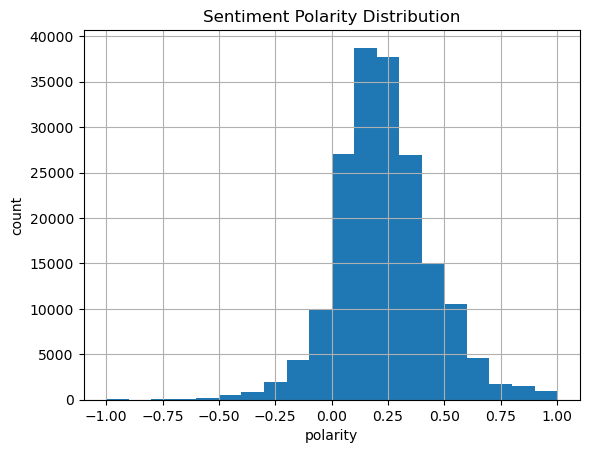

In [11]:
df['polarity'].hist(bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Review Text Length Distribution')

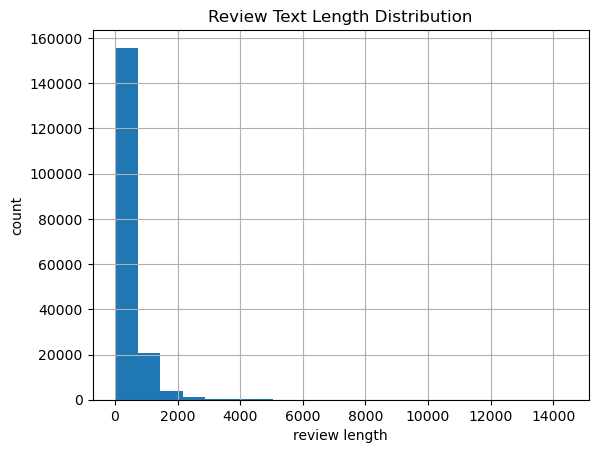

In [12]:
df['review_len'].hist(bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')

Text(0.5, 1.0, 'Word Count Distribution')

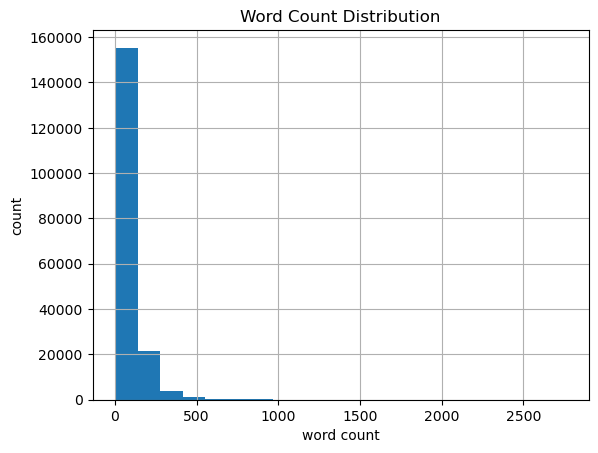

In [13]:
df['word_count'].hist(bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')

# 7. Visualize polarity considering the rating

Text(0.5, 1.0, 'Polarity considering Rating')

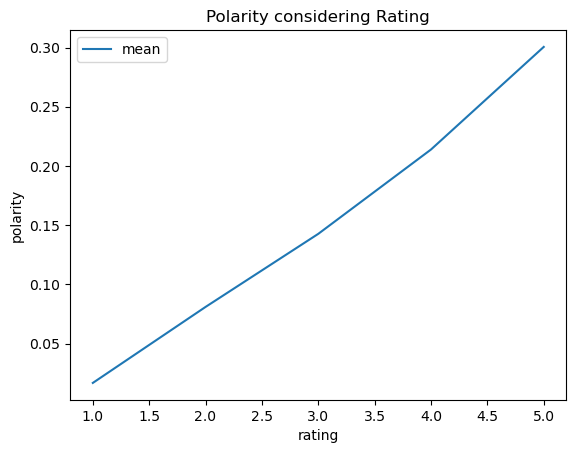

In [14]:
df.groupby(by='rating').polarity.agg([np.mean]).plot()
plt.xlabel('rating')
plt.ylabel('polarity')
plt.title('Polarity considering Rating')

# 8. Visualize the count of the reviews of each rating available in the dataset.

Text(0.5, 1.0, 'count of the reviews of each rating')

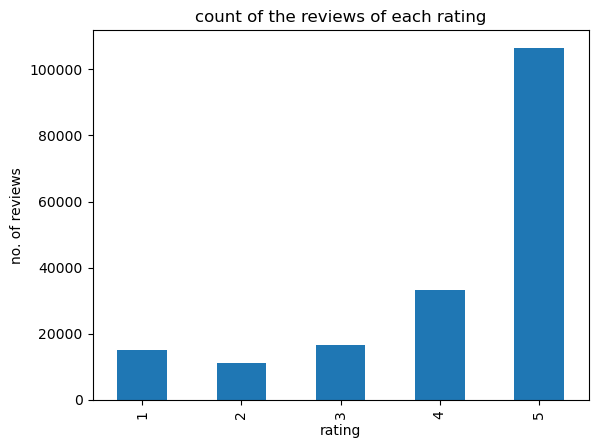

In [15]:
df.groupby(by='rating').review.count().plot.bar()
plt.xlabel('rating')
plt.ylabel('no. of reviews')
plt.title('count of the reviews of each rating')

# 9. List the Top 20 products based on the polarity.

In [16]:
df.sort_values(by='polarity', ascending=False)[0:20]

,name,review,rating,polarity,review_len,word_count,avg_word_len
173618,Udder Covers - Breast Feeding Nursing Cover (C...,purchased for daughter who thinks this is wond...,5,1.0,119,21,4.714286
11710,Summer Infant Multi Use Extra Tall Walk-Thru ...,this gate would be wonderful if it would not h...,4,1.0,211,42,4.023810
159804,Cuisinart BW-10 Baby Bottle Warmer and Night L...,the best quality. excellent. a must for babies.,5,1.0,47,8,5.000000
69784,Edushape Bath Crayons,these lasted one night before being pitched in...,1,1.0,411,69,4.971014
135456,Sanrio Hello Kitty Baby Powdered Milk Formula ...,this was perfect for my daughters g tube feedi...,5,1.0,165,28,4.857143
135458,Boutique Daisy Garden 13PCS CRIB BEDDING SET,very beautiful and well made! didnt wash the c...,5,1.0,110,20,4.550000
163873,Baby Buddy &quot;Size-It&quot; Closet Organize...,great for organizing my son's clothes!,5,1.0,38,6,5.500000
25059,Prince Lionheart On-the-Go Bottle Warmer,bought it for me sister. she thought it was t...,5,1.0,99,16,5.187500
41182,Dr. Brown\'s Bottle Brush,if you buy dr brown bottles this cleaner is a ...,5,1.0,110,21,4.285714
167952,Disney Winnie the Pooh Fitted Crib Sheet - Cream,fits mattress perfectly and matches the beddin...,4,1.0,196,39,4.051282


# 10. Visualize to check whether the review length changes with rating.

C:\Users\KEERTHAN\AppData\Local\Temp\ipykernel_12636\1852984568.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='review_len', data=df, ci=None)


Text(0.5, 1.0, 'Review Length vs Rating')

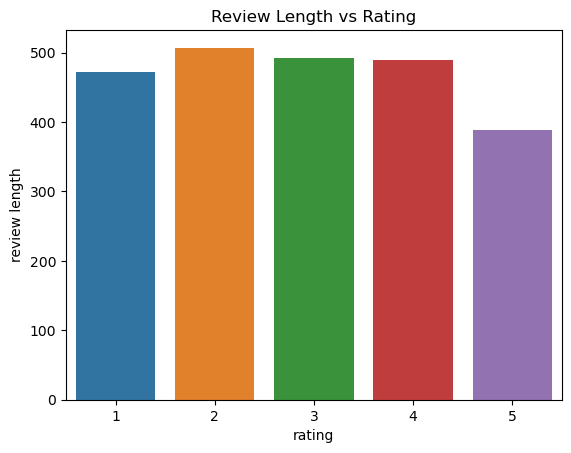

In [17]:
sns.barplot(x='rating', y='review_len', data=df, ci=None)
plt.xlabel('rating')
plt.ylabel('review length')
plt.title('Review Length vs Rating')

# 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram

In [19]:
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Unigrams Count')

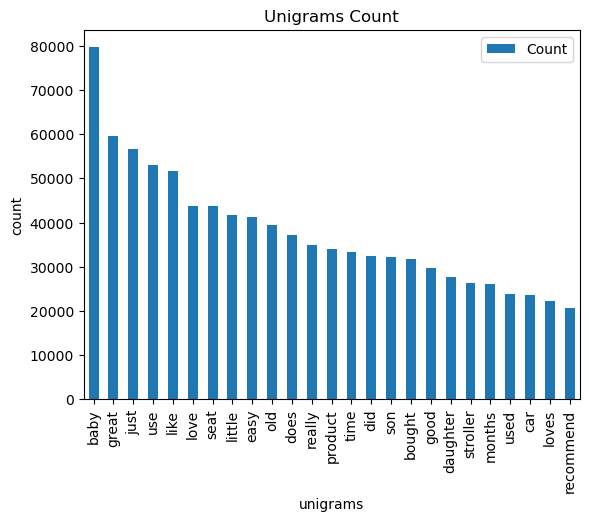

In [20]:
common_words = get_top_n_words(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

df1.set_index('Unigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

In [21]:
def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'BIgrams Count')

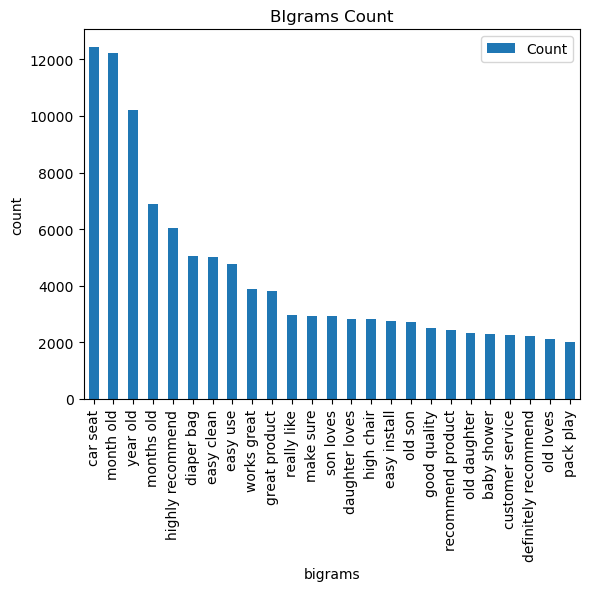

In [22]:
common_words = get_top_n_bigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

df1.set_index('Bigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('BIgrams Count')

In [23]:
def get_top_n_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Trigrams Count')

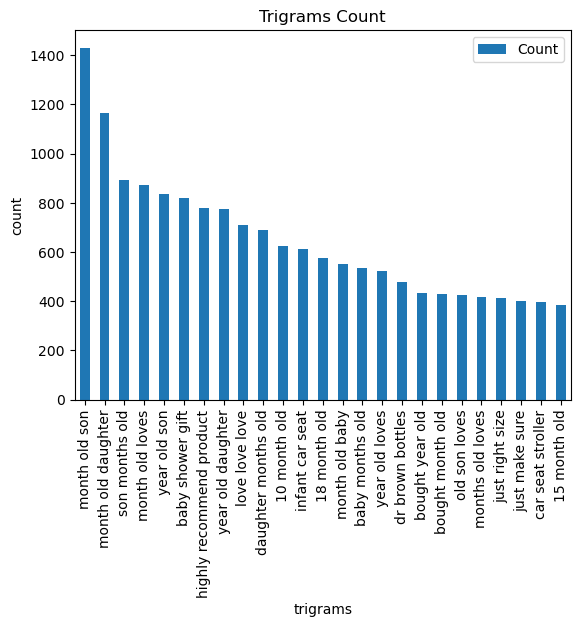

In [24]:
common_words = get_top_n_trigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])

df1.set_index('Trigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')